In [1]:
import h5py
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.signal import correlate2d
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
file = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/denoising/run_07282024_multiPulse/outputs_fromEvenDist/testAutoencoder_eval_results.h5"

In [3]:
# Load the HDF5 file and extract data
with h5py.File(file, 'r') as h5file:
    inputs = []
    outputs = []
    targets = []
    losses = []

    for key in h5file.keys():
        group = h5file[key]
        inputs.append(group['input'][:])  # Extract input sinogram
        outputs.append(group['output'][:])  # Extract denoised output
        targets.append(group['target'][:])  # Extract ground truth
        losses.append(group.attrs['loss'])  # Extract loss attribute
    
    inputs = np.array(inputs)
    outputs = np.array(outputs)
    targets = np.array(targets)
    losses = np.array(losses)


In [16]:
def is_all_zero(image):
    return np.all(image == 0)
def calculate_mse(target, output):
    return mean_squared_error(target.flatten(), output.flatten())


def calculate_ssim(target, output):
    
    if is_all_zero(target) and is_all_zero(output):
        return 1.0  # Both images are identical and all zeros
    elif is_all_zero(target) or is_all_zero(output):
        return 0.0  # One image is all zeros, the other is not
    image1 = (target - np.min(target)) / (np.max(target) - np.min(target) )
    image2 = (output - np.min(output)) / (np.max(output) - np.min(output) )
    return ssim(image1, image2, data_range=image2.max() - image2.min())
    # return ssim(target, output, data_range=output.max() - output.min())

def calculate_ssim_improvement(inp, output, truth):
    in_truth = calculate_ssim(inp, truth)
    out_truth = calculate_ssim(output, truth)
    if in_truth == 0:
        return in_truth, out_truth, 100, 0
    improvement = (out_truth-in_truth)/in_truth

    return in_truth, out_truth, improvement, 1
def calculate_2d_correlation(target, output):
    return np.max(correlate2d(target, output, mode='valid'))
def calculate_snr(target, output):
    noise = target - output
    signal_power = np.sum(target ** 2)
    noise_power = np.sum(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

def compute_psnr(truth_image, output_image, max_pixel_value=1.0):
    """
    Compute the Peak Signal-to-Noise Ratio (PSNR) between two images.

    Parameters:
        truth_image (ndarray): Ground truth image.
        output_image (ndarray): Predicted/denoised image.
        max_pixel_value (float): Maximum possible pixel value (e.g., 1.0 for normalized images).

    Returns:
        float: PSNR value in decibels (dB).
    """
    mse = np.mean((truth_image - output_image) ** 2)
    if mse == 0:
        return float('inf')  # Infinite PSNR for identical images
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr


In [21]:
np.min(targets)

np.float32(0.0)

In [17]:
mse_list = []
nrmse_list = []
ssim_list = []
ssim_improvement_list = []
correlation_list = []
snr_list = []
psnr_list = []
i = 0
k = 0
for inp, target, output in zip(inputs, targets, outputs):
    print(i)
    i += 1
    mse_list.append(calculate_mse(target, output))
    in_ssim, out_ssim, ssim_improvement, valid = calculate_ssim_improvement(inp, output, target)
    if valid:
        print(k)
        k+=1
        ssim_list.append(out_ssim)
        ssim_improvement_list.append(ssim_improvement)
    else:
        print("zero case")
    # ssim_list.append(calculate_ssim(target, output))
    correlation_list.append(calculate_2d_correlation(target, output))
    # snr_list.append(calculate_snr(target, output))
    psnr_list.append(compute_psnr(target, output, max_pixel_value=1.0))

    

# Convert results to numpy arrays for further analysis
mse_list = np.array(mse_list)
ssim_list = np.array(ssim_list)
correlation_list = np.array(correlation_list)
# snr_list = np.array(snr_list)
psnr_list = np.array(psnr_list)
ssim_improvement_list = np.array(ssim_improvement_list)

0
0
1
1
2
2
3
3
4
4
5
5
6
zero case
7
6
8
7
9
8
10
9
11
10
12
11
13
12
14
zero case
15
13
16
14
17
15
18
16
19
17
20
zero case
21
18
22
19
23
zero case
24
20
25
21
26
22
27
23
28
zero case
29
24
30
zero case
31
zero case
32
25
33
26
34
zero case
35
27
36
28
37
29
38
30
39
31
40
32
41
33
42
34
43
zero case
44
35
45
36
46
37
47
38
48
39
49
40
50
zero case
51
41
52
42
53
43
54
44
55
zero case
56
45
57
46
58
47
59
48
60
49
61
50
62
51
63
52
64
zero case
65
zero case
66
53
67
54
68
zero case
69
55
70
56
71
57
72
58
73
zero case
74
59
75
60
76
61
77
zero case
78
62
79
63
80
64
81
65
82
66
83
67
84
zero case
85
zero case
86
68
87
69
88
70
89
71
90
72
91
73
92
74
93
75
94
76
95
77
96
78
97
79
98
80
99
81
100
82
101
zero case
102
83
103
84
104
85
105
86
106
87
107
88
108
89
109
90
110
zero case
111
91
112
92
113
93
114
zero case
115
94
116
95
117
zero case
118
96
119
97
120
98
121
99
122
zero case
123
zero case
124
100
125
101
126
zero case
127
102
128
103
129
104
130
105
131
106
132
107
133
10

In [18]:
psnr_list

array([38.6607399 , 34.3978653 , 40.13578033, ..., 36.86262894,
               inf, 45.79851532])

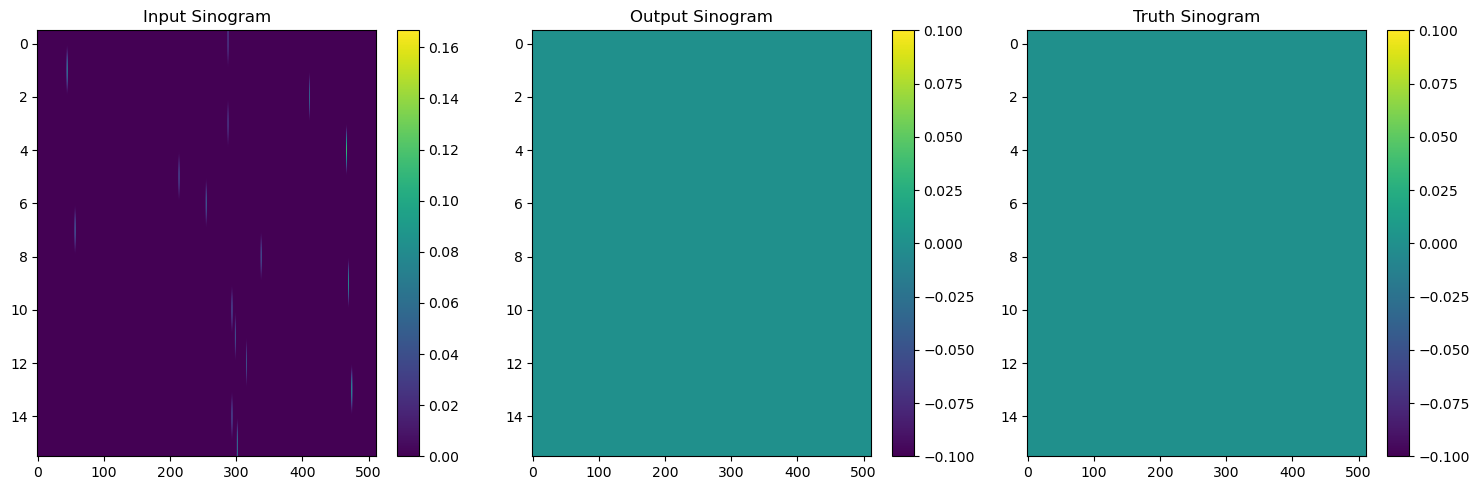

(0.0, 1.0, 100, 0)

In [7]:
# Create a 3-subfigure plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
j = 6
# Plot the input sinogram
im1 = ax1.imshow(inputs[j], aspect='auto', cmap='viridis')
ax1.set_title("Input Sinogram")
ax1.axis('on')
fig.colorbar(im1, ax=ax1, orientation='vertical')

# Plot the output sinogram
im2 = ax2.imshow(outputs[j], aspect='auto', cmap='viridis')
ax2.set_title("Output Sinogram")
ax2.axis('on')
fig.colorbar(im2, ax=ax2, orientation='vertical')

# Plot the truth sinogram
im3 = ax3.imshow(targets[j], aspect='auto', cmap='viridis')
ax3.set_title("Truth Sinogram")
ax3.axis('on')
fig.colorbar(im3, ax=ax3, orientation='vertical')

# Adjust layout
plt.tight_layout()
plt.show()

calculate_ssim_improvement(inputs[j], outputs[j], targets[j])

In [8]:
print("Mean Squared Error (MSE):", np.mean(mse_list))
print("Structural Similarity Index (SSIM):", np.mean(ssim_list))
print("Structural Similarity Index (SSIM) Improvement:", np.mean(ssim_improvement_list))

print("2D Correlation:", np.mean(correlation_list))
finite_psnr_values = [value for value in psnr_list if value != float('inf')]

print("Peak Signal-to-Noise Ratio (SNR):", np.mean(psnr_list))
print("Finite Peak Signal-to-Noise Ratio (SNR):", np.mean(finite_psnr_values))


Mean Squared Error (MSE): 0.00011259862
Structural Similarity Index (SSIM): 0.9336821856258223
Structural Similarity Index (SSIM) Improvement: 0.29446164387314067
2D Correlation: 5.0409336
Peak Signal-to-Noise Ratio (SNR): inf
Finite Peak Signal-to-Noise Ratio (SNR): 39.88588991589628


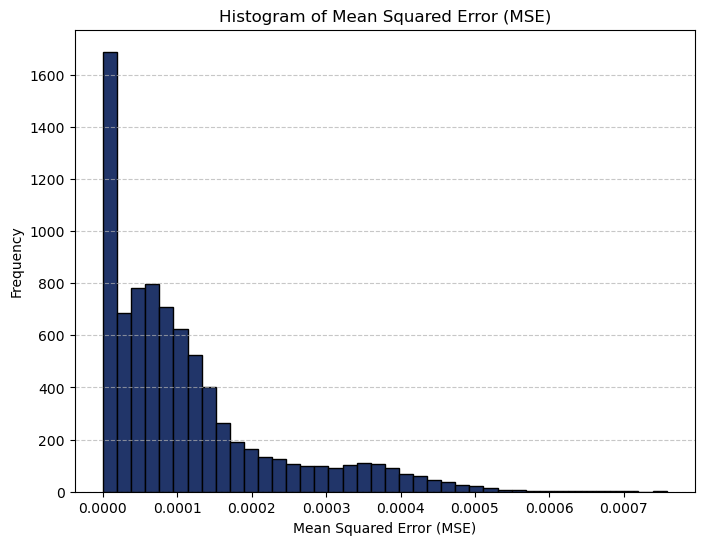

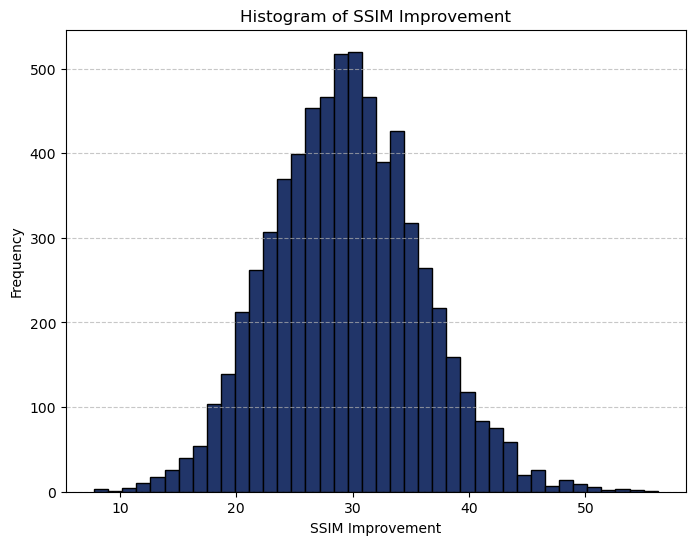

In [27]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 
# Define error metrics and their corresponding data
error_metrics = {
    "Mean Squared Error (MSE)": mse_list,
    # "Structural Similarity Index (SSIM)": ssim_list,
    "SSIM Improvement": ssim_improvement_list*100,
    # "2D Correlation": correlation_list,
    # "Finite Peak Signal-to-Noise Ratio (SNR)": finite_psnr_values,
}

# Plot histograms for each metric
for metric_name, values in error_metrics.items():
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=40, alpha=1, edgecolor='black', color="#213569")
    plt.title(f"Histogram of {metric_name}")
    plt.xlabel(metric_name)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("/sdf/home/j/jhirschm/Publications/MRCO_XrayReconstruction_Paper_Results/"+metric_name+".pdf")
    # plt.savefig("temp.pdf")
    plt.show()

In [30]:
mean = np.mean(ssim_improvement_list*100)
std = np.std(ssim_improvement_list*100)
print(f'Mean: {mean:.4f}, Std: {std:.4f}')
mean = np.mean(mse_list*1e4)
std = np.std(mse_list*1e4)
print(f'Mean: {mean:.4f}, Std: {std:.4f}')
ordered_indices = sorted(range(len(ssim_improvement_list)), key=lambda i: ssim_improvement_list[i])
print(ordered_indices[0])
print(ordered_indices[0]%32)
print(ordered_indices[0]/32)
print(ssim_improvement_list[ordered_indices[0]])

print(5874%32)
print(5874/32)

Mean: 29.4462, Std: 6.4050
Mean: 1.1260, Std: 1.1703
4674
2
146.0625
0.07771124212814746
18
183.5625


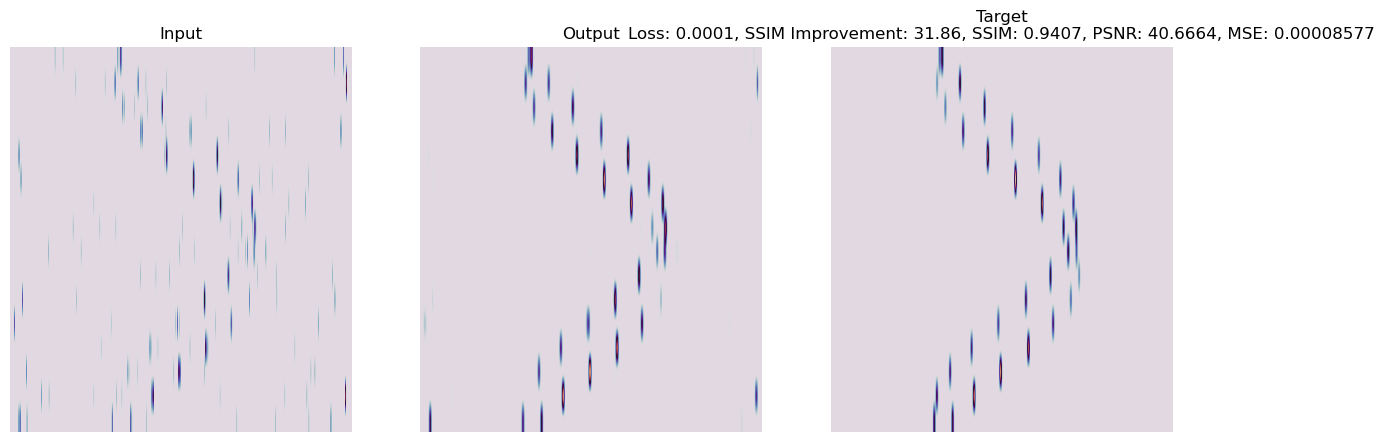

In [35]:
def load_and_plot_h5(results_filepath, index, color_style='viridis', plot_name=None):
    # Load the HDF5 file
    with h5py.File(results_filepath, 'r') as h5file:
        group = h5file[index]

        # Extract data
        input_data = group['input'][:]
        output_data = group['output'][:]
        target_data = group['target'][:]
        loss = group.attrs['loss']
        mse = calculate_mse(target_data, output_data)
        in_ssim, out_ssim, ssim_improvement, valid = calculate_ssim_improvement(input_data, output_data, target_data)
    
        corr = calculate_2d_correlation(target_data, output_data)
        psnr = compute_psnr(target_data, output_data, max_pixel_value=1.0)

        # Plot the data
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(input_data, cmap=color_style, aspect='auto')
        axes[0].set_title('Input')
        axes[0].axis('off')

        axes[1].imshow(output_data, cmap=color_style, aspect='auto')
        axes[1].set_title('Output')
        axes[1].axis('off')

        axes[2].imshow(target_data, cmap=color_style, aspect='auto')
        axes[2].set_title(f'Target\nLoss: {loss:.4f}, SSIM Improvement: {ssim_improvement*100:.2f}, SSIM: {out_ssim:.4f}, PSNR: {psnr:.4f}, MSE: {mse:.8f}')
        axes[2].axis('off')

        if plot_name is not None:
            plt.savefig(plot_name)
        plt.show()


file = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/denoising/run_07282024_multiPulse/outputs_fromEvenDist/testAutoencoder_eval_results.h5"
data_load = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/denoising/run_07282024_multiPulse/outputs_fromEvenDist/testAutoencoder_eval_results.h5"
# data_load = "/sdf/scratch/lcls/ds/prj/prjs2e21/scratch/fast_data_access/even-dist_Pulses_03302024/Processed_07262024_0to1/test/"
index = "199_0"  # Replace with the index you want to plot
# index = "183_1"  # Replace with the index you want to plot


cmap = "twilight"
# cmap "plasma"
load_and_plot_h5(data_load, index, color_style=cmap, plot_name="/sdf/home/j/jhirschm/Publications/MRCO_XrayReconstruction_Paper_Results/denoised_double_ssim__.pdf")


In [12]:
def validate_images(image1, image2):
    assert image1.shape == image2.shape, "Input images must have the same shape"
    assert np.isfinite(image1).all(), "Image 1 contains NaN or Inf values"
    assert np.isfinite(image2).all(), "Image 2 contains NaN or Inf values"
image1 = targets[0,:,:]
image2 = outputs[0,:,:]
image1 = (image1 - np.min(image1)) / (np.max(image1) - np.min(image1) )
image2 = (image2 - np.min(image2)) / (np.max(image2) - np.min(image2) )
score = ssim(image1, image2, data_range=image2.max() - image2.min())
print("SSIM Score:", score)

SSIM Score: 0.9505084615703231


In [13]:
targets.shape

(8192, 16, 512)

In [14]:
from skimage.metrics import structural_similarity as ssim
from scipy.signal import correlate2d
import numpy as np

def evaluate_images(input_image, output_image, truth_image):
    metrics = {}

    # Normalize images to [0, 1]
    def normalize(image):
        return (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)

    output_image = normalize(output_image)
    truth_image = normalize(truth_image)

    # Mean Squared Error
    mse = np.mean((output_image - truth_image) ** 2)
    metrics['MSE'] = mse

    # Structural Similarity Index (SSIM)
    ssim_score = ssim(output_image, truth_image, data_range=truth_image.max() - truth_image.min())
    metrics['SSIM'] = ssim_score

    # 2D Correlation
    correlation = np.max(correlate2d(output_image, truth_image, mode='valid'))
    metrics['2D Correlation'] = correlation

    return metrics


In [6]:
import matplotlib.pyplot as plt

def visualize_results(input_image, output_image, truth_image):
    plt.figure(figsize=(12, 4))
    titles = ['Input', 'Output', 'Truth']
    images = [input_image, output_image, truth_image]

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img, cmap='viridis')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.feature import match_descriptors
from skimage.color import rgb2gray
from skimage.util import img_as_float
from scipy.ndimage import gaussian_filter

def compute_descriptors(image, keypoints, patch_size=9):
    """Compute descriptors for each keypoint as normalized patches."""
    half_size = patch_size // 2
    descriptors = []

    for y, x in keypoints:
        # Extract patch around the keypoint
        if (
            y - half_size >= 0 and
            y + half_size + 1 <= image.shape[0] and
            x - half_size >= 0 and
            x + half_size + 1 <= image.shape[1]
        ):
            patch = image[y - half_size:y + half_size + 1, x - half_size:x + half_size + 1]
            patch = patch - np.mean(patch)  # Normalize patch
            patch = patch / (np.std(patch) + 1e-8)  # Avoid divide-by-zero
            descriptors.append(patch.flatten())

    return np.array(descriptors)

def match_features(output_image, truth_image, patch_size=9):
    """Match features between two images."""
    # Convert images to grayscale and float format if necessary
    output_image = img_as_float(rgb2gray(output_image)) if len(output_image.shape) == 3 else img_as_float(output_image)
    truth_image = img_as_float(rgb2gray(truth_image)) if len(truth_image.shape) == 3 else img_as_float(truth_image)

    # Detect keypoints using Harris corner detector
    keypoints_output = corner_peaks(corner_harris(output_image), min_distance=5)
    keypoints_truth = corner_peaks(corner_harris(truth_image), min_distance=5)

    # Compute descriptors for the detected keypoints
    descriptors_output = compute_descriptors(output_image, keypoints_output, patch_size)
    descriptors_truth = compute_descriptors(truth_image, keypoints_truth, patch_size)

    # Match descriptors using cosine similarity
    matches = match_descriptors(descriptors_output, descriptors_truth, metric="euclidean", cross_check=True)

    return len(matches), keypoints_output, keypoints_truth, matches


In [36]:
num_matches, kp_output, kp_truth, matches = match_features(outputs[0,:,:], targets[0,:,:])

In [38]:
kp_output

array([[  9, 233],
       [  6, 304],
       [  7, 281],
       [  8, 257],
       [  9, 428],
       [  8,  35],
       [ 10,  25],
       [  8, 105],
       [  6, 113],
       [  7, 379],
       [  9,  66],
       [  8,  53]])

ValueError: not enough values to unpack (expected 2, got 1)

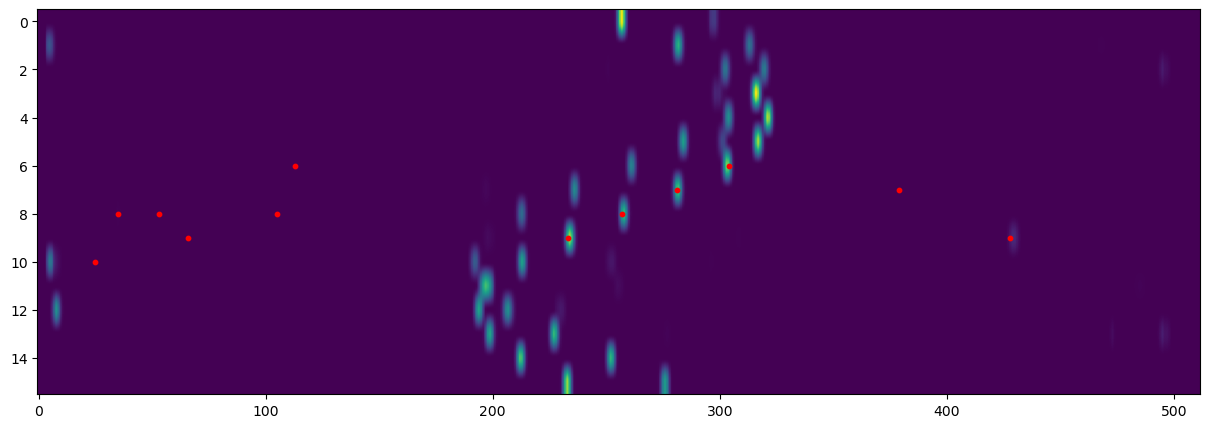

In [34]:
import matplotlib.pyplot as plt

def visualize_keypoints_with_square_aspect(image, keypoints, matches=None, title="Image with Keypoints"):
    """
    Visualize keypoints overlaid on an image with a square aspect ratio.

    Parameters:
        image (ndarray): The image to plot.
        keypoints (ndarray): Array of keypoints (y, x) to overlay.
        matches (list): Optional. List of matches [(keypoint1, keypoint2), ...].
        title (str): Title of the plot.
    """
    plt.figure(figsize=(15, 5))
    plt.imshow(image, cmap='viridis', aspect='auto')
    plt.scatter(keypoints[:, 1], keypoints[:, 0], c='red', s=10, label='Keypoints')  # Overlay keypoints
    if matches is not None:
        for kp1, kp2 in matches:
            plt.plot([kp1[1], kp2[1]], [kp1[0], kp2[0]], color='yellow', linewidth=0.5)  # Draw matches
    plt.title(title)
    # plt.axis('on')
    # # plt.gca().set_aspect(image.shape[1] / image.shape[0])  # Set square-like appearance
    # plt.legend()
    # plt.show()

visualize_keypoints_with_square_aspect(outputs[0,:,:], kp_output, "Output Keypoints")
visualize_keypoints_with_square_aspect(targets[0,:,:], kp_truth, "Truth Keypoints")


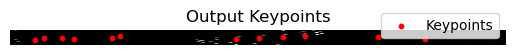

In [30]:
visualize_keypoints(outputs[0,:,:], kp_output, "Output Keypoints")
